In [1]:
import tensorflow as tf
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
from model import Model
from dataset import *

import matplotlib.pyplot as plt
%matplotlib inline

# plt.rcParams['font.family']='NanumGothicCoding'
# global font setting
# if not working, remove matplotlib cache file (rm -rf /root/.cache/matplotlib/*)

def _plot_score(vec, pred_text, xticks):
    _axis_fontsize=13
    fig=plt.figure(figsize = (14,10))
    plt.yticks([])
    plt.xticks(range(0,len(vec)), xticks, fontsize=_axis_fontsize)
    fig.add_subplot(1, 1, 1)
    plt.figtext(x=0.13, y=0.54, s='Prediction: {}'.format(pred_text), fontsize=15, fontname='sans-serif')
    img = plt.imshow([vec], vmin=0, vmax=1)
    plt.show()
    
def _get_text_xticks(sentence):
    tokens = [word_.strip() for word_ in sentence.split(' ')]
    return tokens

def visualize_gradcam_text(sentences, checkpoint_path, max_article_length):
    
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    
    model = Model()
    classifier = tf.estimator.Estimator(model_fn=model.build,
                                        config=tf.estimator.RunConfig(session_config=config),
                                        params={
                                            'feature_columns': [tf.feature_column.numeric_column(key='x')], \
                                            'kernels': [(3,512),(4,512),(5,512)], \
                                            'num_classes': 2, \
                                            'max_article_length': max_article_length
    })
    
    data = SST(Word2vecEnWordEmbedder)
    pred_val = classifier.predict(input_fn=lambda: data.predict_input_fn(sentences, padded_size=MAX_ARTICLE_LENGTH),
                                  checkpoint_path=checkpoint_path)
    for i, _val in enumerate(pred_val):
        pred_idx = _val['predict_index'][0]
        vec = _val['grad_cam'][pred_idx][:17]
        pred_text = "Negative" if pred_idx==0 else "Positive"
        _plot_score(vec=vec, pred_text=pred_text, xticks=_get_text_xticks(sentences[i]))


INFO:tensorflow:Using config: {'_log_step_count_steps': 100, '_task_type': 'worker', '_num_ps_replicas': 0, '_tf_random_seed': None, '_save_checkpoints_steps': None, '_model_dir': '/tmp/tmpvt85fqoo', '_keep_checkpoint_max': 5, '_num_worker_replicas': 1, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f591f9d4ac8>, '_keep_checkpoint_every_n_hours': 10000, '_is_chief': True, '_session_config': gpu_options {
  allow_growth: true
}
, '_save_summary_steps': 100, '_task_id': 0, '_service': None, '_master': '', '_save_checkpoints_secs': 600}
INFO:tensorflow:Restoring parameters from ./ckpt/0401_151904/model.ckpt-2566


/usr/local/lib/python3.5/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


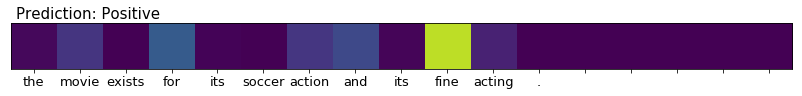

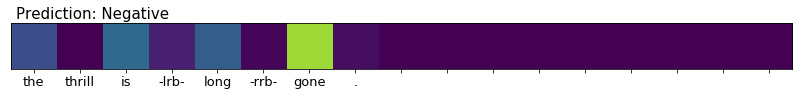

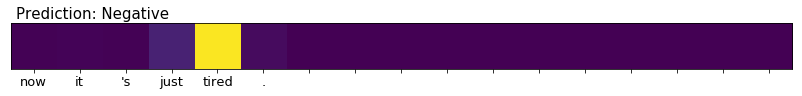

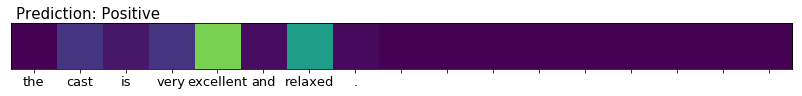

In [2]:
MAX_ARTICLE_LENGTH = 500
CKPT = './ckpt/0401_151904/model.ckpt-2566'

visualize_gradcam_text(['the movie exists for its soccer action and its fine acting .',
                      'the thrill is -lrb- long -rrb- gone .',
                      "now it 's just tired .",
                      'the cast is very excellent and relaxed .'], \
                       checkpoint_path=CKPT, \
                       max_article_length=MAX_ARTICLE_LENGTH)